In [572]:
#setup cell
import os, sys, glob
import math
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
df_samples = pd.read_csv("./result.csv")
df_samples["status"]=df_samples.apply(lambda row: 0 if not row.PASS else (1 if row.clonal else 2), axis=1)
df_pivot = df_samples.pivot_table('status',['pos','var','ref'],'sample').fillna(0)
df_pivot_filtered = df_pivot[df_pivot.apply(np.sum, axis=1) > 0]
df_pivot_filtered

,,sample,CF_Pl42_A1,CF_Pl42_A10,CF_Pl42_A11,CF_Pl42_A12,CF_Pl42_A2,CF_Pl42_A3,CF_Pl42_A4,CF_Pl42_A5,CF_Pl42_A6,CF_Pl42_A7,...,CFpl122a_G3,CFpl122a_G4,CFpl122a_G5,CFpl122a_G6,CFpl122a_H1,CFpl122a_H2,CFpl122a_H3,CFpl122a_H4,CFpl122a_H5,CFpl122a_H6
pos,var,ref,,,,,,,,,,,,,,,,,,,,,
3220,T,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0
40664,C,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40675,C,T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40677,C,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40753,C,G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6190552,C,T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6214679,C,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6214711,T,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [573]:
#defining shared_clonal, private_clonal, shared_subclonal, and private_subclonal
shared_clonal = set()
shared_subclonal = set()
private_clonal = set()
private_subclonal = set()
for idx, row in df_pivot.iterrows():
    clonal_count = np.where(row == 1)
    subclonal_count = np.where(row == 2)
    # print(clonal_count[0])
    # print(subclonal_count[0])
    # break
    if len(clonal_count[0]) > 1:
        shared_clonal.add(idx)
    elif len(clonal_count[0]) == 1:
        private_clonal.add(idx)
    if len(subclonal_count[0]) > 1:
        shared_subclonal.add(idx)
    elif len(subclonal_count[0]) == 1:
        private_subclonal.add(idx)

In [574]:
#define set of mutations that a sample has. Stored as a dictionary with sample name as the key and the set of mutations as the value
sampleMutations = {}
for series_name, series in df_pivot_filtered.items():
    sampleMutations[series_name] = set()
    for position in series.index:
        if series[position] > 0:
            sampleMutations[series_name].add(position)

In [575]:
#identify all samples that contain a mutation that is shared_subclonal
contaminated_samples = set()
sampleMutations_filtered = sampleMutations.copy()
for sample_name, sample_muts in sampleMutations_filtered.items():
    this_sample_subclonal_muts = set()
    for mutation in sample_muts:
        if mutation in shared_subclonal:
            if (mutation in shared_clonal or mutation in private_clonal):
                contaminated_samples.add(sample_name)
print(len(contaminated_samples))

139


139 of 143 total samples contaminated, need to eliminate shared_subclonal mutations from each sample. Can do this in two ways, one simple and one more complex. The first is to drop all mutations that fall under the shared_subclonal category, which will lose some information considering the overlap between shared_subclonal and shared_clonal. The second is to identify which subclonal mutations constitute a contamination, and set that mutation equal to zero for that sample while retaining the mutation. I will start with the first option, then go back and do the second option if I have time.

In [576]:
#define unsorted mutation matrix
df_drop = df_pivot_filtered.copy()
df_notdropped = df_pivot_filtered.copy()
# df_drop.index = df_drop.index.get_level_values(0)
for mut in shared_subclonal:
    # print(df_drop.index)
    row = mut[0]
    l0 = df_drop.index.get_level_values(0)
    var = mut[1]
    l1 = df_drop.index.get_level_values(1)
    ref = mut[2]
    l2 = df_drop.index.get_level_values(2)
    df_temp = df_drop[(l0 == row) & (l1 == var) & (l2 == ref)].index
    df_drop = df_drop.drop(labels=df_temp)
df_drop.index = [str(a) + str(b) + str(c) for a, b, c in zip(df_drop.index.get_level_values(0), df_drop.index.get_level_values(1), df_drop.index.get_level_values(2))]
df_notdropped.index = [str(a) + str(b) + str(c) for a, b, c in zip(df_notdropped.index.get_level_values(0), df_notdropped.index.get_level_values(1), df_notdropped.index.get_level_values(2))]
df_drop

sample,CF_Pl42_A1,CF_Pl42_A10,CF_Pl42_A11,CF_Pl42_A12,CF_Pl42_A2,CF_Pl42_A3,CF_Pl42_A4,CF_Pl42_A5,CF_Pl42_A6,CF_Pl42_A7,...,CFpl122a_G3,CFpl122a_G4,CFpl122a_G5,CFpl122a_G6,CFpl122a_H1,CFpl122a_H2,CFpl122a_H3,CFpl122a_H4,CFpl122a_H5,CFpl122a_H6
40664CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40675CT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40677CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40753CG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57829CT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088806GA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6181237TC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6190552CT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6214711TC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [590]:
# sort mutation matrix as seen in class such that the mutations that happen most frequently are the leftmost columns
df_drop2 = df_drop.copy()
df_notdropped2 = df_notdropped.copy()
for col in df_drop2:
    df_drop2.loc[df_drop2[col] == 2, col] = 1

for col in df_notdropped2:
    df_notdropped2.loc[df_notdropped2[col] == 2, col] = 1

s = df_drop2.T.sum()
sn = df_notdropped2.T.sum()
df_drop_sorted = df_drop.T[s.sort_values(ascending=False).index]
df_notdropped_sorted = df_notdropped.T[sn.sort_values(ascending=False).index]
mm = df_drop_sorted.T
mmnotdrop = df_notdropped_sorted.T
mmnotdrop.T.sum()

718809CT     172.0
2030750CT    129.0
47785CT      128.0
5715167GA    128.0
2705151TC    128.0
             ...  
2571478AG      2.0
2573952TA      2.0
2578061TA      2.0
2612117GA      2.0
6235607CT      2.0
Length: 854, dtype: float64

In [578]:
# generate lists of which samples come from which location / timepoint
lower_lung = """ CF_Pl42_A10 
CF_Pl42_A11
CF_Pl42_A12
CF_Pl42_A7
CF_Pl42_A8
CF_Pl42_A9
CF_Pl42_B10
CF_Pl42_B11
CF_Pl42_B12
CF_Pl42_B7
CF_Pl42_B8
CF_Pl42_B9
CF_Pl42_C10
CF_Pl42_C11
CF_Pl42_C12
CF_Pl42_C7
CF_Pl42_C8
CF_Pl42_C9
CF_Pl42_D10
CF_Pl42_D11
CF_Pl42_D12
CF_Pl42_D7
CF_Pl42_D8
CF_Pl42_D9
CF_Pl42_E10
CF_Pl42_E11
CF_Pl42_E12
CF_Pl42_E7
CF_Pl42_E8
CF_Pl42_E9
CF_Pl42_F10
CF_Pl42_F11
CF_Pl42_F12
CF_Pl42_F7
CF_Pl42_F8
CF_Pl42_F9
"""
lower_lung = lower_lung.split()
upper_lung = """
CF_Pl42_A1
CF_Pl42_A2
CF_Pl42_A3
CF_Pl42_A4
CF_Pl42_A5
CF_Pl42_A6
CF_Pl42_B1
CF_Pl42_B2
CF_Pl42_B3
CF_Pl42_B4
CF_Pl42_B5
CF_Pl42_B6
CF_Pl42_C1
CF_Pl42_C2
CF_Pl42_C3
CF_Pl42_C4
CF_Pl42_C5
CF_Pl42_C6
CF_Pl42_D1
CF_Pl42_D3
CF_Pl42_D4
CF_Pl42_D5
CF_Pl42_D6
CF_Pl42_E1
CF_Pl42_E2
CF_Pl42_E3
CF_Pl42_E4
CF_Pl42_E5
CF_Pl42_E6
CF_Pl42_F1
CF_Pl42_F2
CF_Pl42_F3
CF_Pl42_F4
CF_Pl42_F5
CF_Pl42_F6
"""
upper_lung = upper_lung.split()
sputum_t1 = """
CF_Pl42_G1
CF_Pl42_G10
CF_Pl42_G11
CF_Pl42_G12
CF_Pl42_G2
CF_Pl42_G3
CF_Pl42_G4
CF_Pl42_G5
CF_Pl42_G6
CF_Pl42_G7
CF_Pl42_G8
CF_Pl42_G9
CF_Pl42_H1
CF_Pl42_H10
CF_Pl42_H11
CF_Pl42_H12
CF_Pl42_H2
CF_Pl42_H3
CF_Pl42_H4
CF_Pl42_H5
CF_Pl42_H6
CF_Pl42_H7
CF_Pl42_H8
CF_Pl42_H9
"""
sputum_t1 = sputum_t1.split()
sputum_t2 = """
CFpl122a_A1
CFpl122a_A2
CFpl122a_A3
CFpl122a_A4
CFpl122a_A5
CFpl122a_A6
CFpl122a_B1
CFpl122a_B2
CFpl122a_B3
CFpl122a_B4
CFpl122a_B5
CFpl122a_B6
CFpl122a_C1
CFpl122a_C2
CFpl122a_C3
CFpl122a_C4
CFpl122a_C5
CFpl122a_C6
CFpl122a_D1
CFpl122a_D2
CFpl122a_D3
CFpl122a_D4
CFpl122a_D5
CFpl122a_D6
CFpl122a_E1
CFpl122a_E2
CFpl122a_E3
CFpl122a_E4
CFpl122a_E5
CFpl122a_E6
CFpl122a_F1
CFpl122a_F2
CFpl122a_F3
CFpl122a_F4
CFpl122a_F5
CFpl122a_F6
CFpl122a_G1
CFpl122a_G2
CFpl122a_G3
CFpl122a_G4
CFpl122a_G5
CFpl122a_G6
CFpl122a_H1
CFpl122a_H2
CFpl122a_H3
CFpl122a_H4
CFpl122a_H5
CFpl122a_H6
"""
sputum_t2 = sputum_t2.split()

In [579]:
#setup for package installation for creating the phylogeny
import sys
!{sys.executable} -m pip install ete3
!{sys.executable} -m pip install PyQt5
!{sys.executable} -m pip install colour

In [580]:
#setup for importing all modules needed to create phylogeny
import ete3
from colour import Color
from ete3 import Tree
from ete3 import TreeStyle
from ete3 import NodeStyle
from ete3 import TextFace
from ete3 import add_face_to_node
import PyQt5

In [604]:
#creates the phylogeny, 8 possible ways to execute depending on parameters of:
    # whether or not to include a sample's subclonal mutations (these belong to private_subclonal, not shared_subclonal)
        # parameter restrict_to_clonal
            # set to False if you want to include subclonal mutations
            # set to True if you want to restrict to clonal mutations
    # whether or not to allow homoplasy
        # parameter homoplasy
            # set to True to allow homoplasy
            # set to False to not
    # whether to use the matrix with all the shared_subClonal removed vs included
        # parameter remove_sharedSubclonal
            # set to True to remove
            # set to False to include
root = Tree(format=3)
edges_created = {}
bad_samples = set()
good_samples = set()
restrict_to_clonal = True
homoplasy = True
remove_sharedSubclonal = True
mutation_matrix = None
if remove_sharedSubclonal:
    mutation_matrix = mm
else:
    mutation_matrix = mmnotdrop
# iterate over each 'row', in this case each sample
for sample in mutation_matrix:
    flag = False # used to stop iterating over mutations in a sample if homoplasy is detected
    curr_node = root # start at the root node
    c = 1 #records number of edges between this node and the 'root'
    sample_name = ''
    if sample in lower_lung:
        sample_name = 'LL-'+sample
    elif sample in upper_lung:
        sample_name = 'UL-'+sample
    elif sample in sputum_t1:
        sample_name = 'S1-'+sample
    elif sample in sputum_t2:
        sample_name = 'S2-'+sample
    for mutation in mutation_matrix[sample].index:
        if flag == True: 
            break
        if mutation_matrix[sample][mutation] >= 1:
            
            # this if statement filters whether or not to restrict mutations to clonal or not
            if mutation_matrix[sample][mutation] > 1 and restrict_to_clonal:
                continue
            
            child_names = [c.name for c in curr_node.children]
            if mutation in child_names:
                curr_node = curr_node.children[child_names.index(mutation)]
                c+=1
                continue
            else:
                # this if statement detects homoplasy
                if mutation in edges_created and not homoplasy:
                    bad_samples.add(sample)
                    child = curr_node.add_child(name=sample_name)
                    child.add_features(level=c)
                    edges_created[mutation] += 1
                    flag = True
                elif mutation in edges_created:
                    curr_node = curr_node.add_child(name=mutation)
                    curr_node.add_features(level=c)
                    c+=1
                    edges_created[mutation] += 1
                else:
                    curr_node = curr_node.add_child(name=mutation)
                    curr_node.add_features(level=c)
                    c+=1
                    edges_created[mutation] = 1
    #after all mutations have been iterated over
    if flag == False:
        newnode = curr_node.add_child(name=sample_name)
        newnode.add_features(level=c)
        good_samples.add(sample)
# prints lengths of bad samples (would result in homoplasy) and good samples (do not result in homoplasy). Will add to 143.
# if homoplasy is allowed, bad_samples will always be 0 and good_samples will always be 143
print(len(bad_samples))
print(len(good_samples))

0
143


In [601]:
#what mutations have homoplasy and how many times do they occur in the tree?
homoplastic_mutations = { str(mutation) : edges_created[mutation] for mutation in edges_created if edges_created[mutation] > 1}
homoplastic_mutations

{'2030750CT': 11,
 '1833976CT': 2,
 '4698862TC': 2,
 '720002TC': 5,
 '3801623AG': 5,
 '5683221AC': 2,
 '719330TC': 5,
 '718808GA': 3,
 '4710929AG': 35,
 '5214837GA': 26,
 '5215270GA': 2,
 '720001TC': 8,
 '2566710AG': 2,
 '4162397AG': 5,
 '577882GC': 2,
 '447411TC': 10,
 '718797GA': 2,
 '5727854GT': 2,
 '4711324AG': 4,
 '3636962AG': 2}

In [602]:
#sorts the phylogeny such that within each node's children, the one with the most children will appear first.
#secondarily such that the child with the most height appears first if two nodes have the same number of children
for n in root.traverse():
    if len(n.children) > 0:
        n.children = sorted(n.children, key= lambda node : (len(node), max(([x.level for x in node])), node.name), reverse=True)

In [603]:
# defines the color red as a starting point
red = Color('red')
blue = Color('blue')
lightred = Color('#F9AAAA')
lightblue = Color('#AAB5F9')
h_mut_colors = [c.hex for c in list(lightred.range_to(lightblue, len(homoplastic_mutations)))]
# creates a treestyle to label all nodes, and color all of the leaves according to the following scheme:
    # only leaves will display as colored, but all nodes will have a color value assigned to them
    # each child of a given node is assigned a color on a gradient from red to blue
    # if there is only one child it will inherit the color of its parent
    # this means that each group of leaves will form its own color gradient, to easily identify groups
ts = TreeStyle()
#'root' node receives color white
root.add_features(color='white')
for node in root.traverse():
    if len(node.children) < 1:
        continue
    if len(node.children) == 1:
        node.children[0].add_features(color=node.color)
        continue
    childColors = [c.hex for c in list(red.range_to(blue, len(node.children)))]
    for i in range(len(node.children)):
            node.children[i].add_features(color=childColors[i])
            lastNode = node.children[i]
#sets tree to be displayed in a circular fashion
ts.mode = 'c'
ts.scale = 100
ts.min_leaf_separation = 10
def my_layout(node):
    nodeName = TextFace(node.name, tight_text=True)
    if node.is_leaf():
        nodeName.background.color = node.color
    else:
        if node.name in homoplastic_mutations:
            nodeName.background.color = h_mut_colors[list(homoplastic_mutations).index(node.name)]
        else:
            nodeName.background.color = 'White'
    
    add_face_to_node(nodeName, node, column=0, position='branch-right')

ts.layout_fn = my_layout

#function to bring up GUI that interactively displays the phylogeny
root.show(tree_style=ts)

In [585]:
#checking that my methods are at least close to correct
from scipy.special import logsumexp
from scipy.stats import norm
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [586]:
#generating nested lists for scipy
sample_labels = mutation_matrix.columns.values
sample_values_subClonal_homoplasyYes = [[1 if mutation_matrix[sample_labels[i]].values[j] >= 1 else 0 for j in range(len(mutation_matrix[sample_labels[i]]))] for i in range(len(sample_labels))] 
sample_values_Clonal_homoplasyYes = [[1 if mutation_matrix[sample_labels[i]].values[j] == 1 else 0 for j in range(len(mutation_matrix[sample_labels[i]]))] for i in range(len(sample_labels))] 

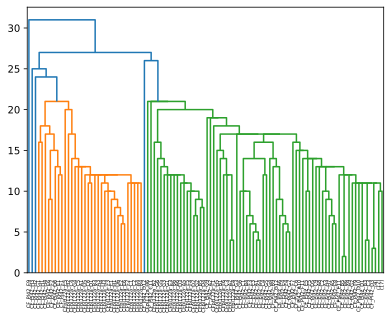

In [587]:
#hierarchical clustering of subclonal + homoplasy, can see that E9 is the most distant from anything else, and in my phylogeny has the most mutations so it checks out
Z = hierarchy.linkage(sample_values_subClonal_homoplasyYes, 'single', 'cityblock')
plt.figure()
dn = hierarchy.dendrogram(Z, labels=sample_labels, p=30, truncate_mode='level', leaf_rotation=90)
plt.show()

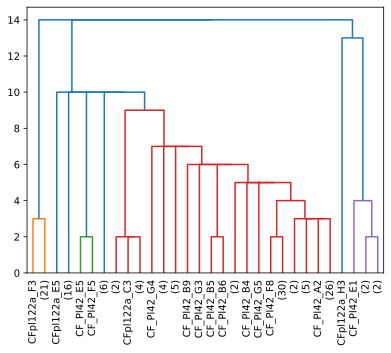

In [588]:
#hierarchical clustering of just clonal + homoplasy, condensed for easier viewing. The larger groups that get condensed in the dendrogram 
# are mirrored in my phylogeny, indicating that my methods are somewhat accurate
# ie group of (16) in dendrogram is set of leaves B2...D4 arising from mutations 1298885, 1477580, 3386982, and 5011693 in phylogeny
Z = hierarchy.linkage(sample_values_Clonal_homoplasyYes, 'single', 'cityblock')
plt.figure()
dn = hierarchy.dendrogram(Z, labels=sample_labels, p=30, truncate_mode='lastp', leaf_rotation=90)
plt.show()